In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import pi, sqrt, log10

# Read data
kom = pd.read_csv('Ranisa.csv')
vol = pd.read_csv('StrainGauge.csv')

In [54]:
kom

,Time (s),Load (N),Extension (mm)
0,0.000000,0.000000,0.000000
1,1.539862,7.751604,0.006609
2,3.079723,25.893717,0.019799
3,4.619585,46.978367,0.033715
4,6.159446,64.844329,0.044743
...,...,...,...
95,146.286843,1918.623955,1.206501
96,147.826705,1939.526579,1.218738
97,149.366566,1958.339872,1.231758
98,150.906428,1979.428503,1.244787


In [55]:
kom.dropna(inplace=True)

In [56]:
l = (7.100+6.800+7.240) / (3 * 100) #m
w = (1.244+1.224+1.236) / (3 * 100) #m
t = (0.316+0.324+0.420) / (3 * 100) #m

A = w * t

ul = 0.00522 * 10**-3
uw = 0.00522 * 10**-3
ut = 0.00522 * 10**-3
uAr = ((t + ul) * (w + uw) - (t * w)) / (t * w)
uFr = sqrt(0.5**2 + 0.1**2 + 0.25**2 / 3) / 100
usigmar = sqrt(uAr**2 + uFr**2)
uepsilonr = ul / l

In [57]:
# Print all u
print('uAr =', uAr)
print('uFr =', uFr)
print('usigmar =', usigmar)
print('uepsilonr =', uepsilonr)

uAr = 0.001900769274420257
uFr = 0.005299371031861549
usigmar = 0.00562994290982719
uepsilonr = 7.407757805108798e-05


In [58]:
# Olah data
# Buat kolom "Stress (Pa)"
kom['Stress (MPa)'] = kom['Load (N)'] / (A * 1000000)
kom['Strain'] = kom['Extension (mm)'] / (l * 1000)
kom['Error Load (N)'] = kom['Load (N)'] * uFr
kom['Error Stress (MPa)'] = kom['Stress (MPa)'] * usigmar
kom['Error Strain'] = kom['Strain'] * uepsilonr

In [59]:
kom

,Time (s),Load (N),Extension (mm),Stress (MPa),Strain,Error Load (N),Error Stress (MPa),Error Strain
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,1.539862,7.751604,0.006609,0.177688,0.000094,0.041079,0.001000,6.947896e-09
2,3.079723,25.893717,0.019799,0.593554,0.000281,0.137220,0.003342,2.081333e-08
3,4.619585,46.978367,0.033715,1.076871,0.000478,0.248956,0.006063,3.544245e-08
4,6.159446,64.844329,0.044743,1.486407,0.000635,0.343634,0.008368,4.703608e-08
...,...,...,...,...,...,...,...,...
94,144.746982,1898.079812,1.193162,43.509104,0.016932,10.058629,0.244954,1.254303e-06
95,146.286843,1918.623955,1.206501,43.980031,0.017122,10.167500,0.247605,1.268326e-06
96,147.826705,1939.526579,1.218738,44.459175,0.017295,10.278271,0.250303,1.281190e-06
97,149.366566,1958.339872,1.231758,44.890427,0.017480,10.377970,0.252731,1.294876e-06


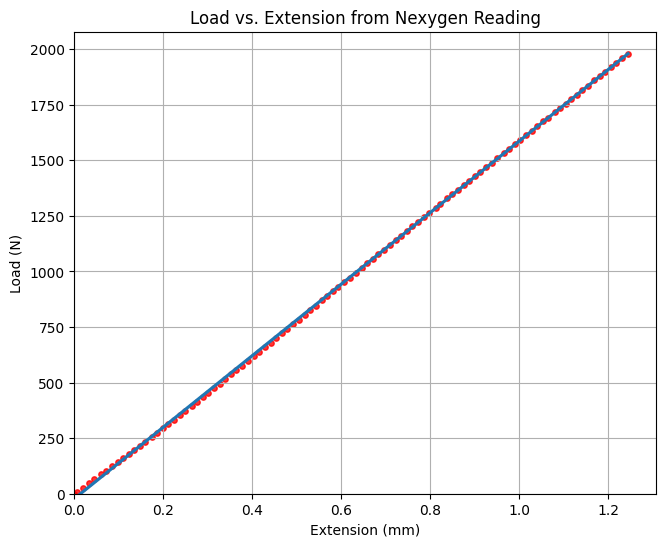

In [60]:
# Make scatter plot
plt.figure(figsize=(7.5, 6))

# sns.scatterplot(x='Extension (mm)', y='Load (N)', data=df)
sns.regplot(x='Extension (mm)', y='Load (N)', data=kom, fit_reg=True, scatter_kws={"s": 15, "color": "red"})

plt.xlim(0, max(kom['Extension (mm)']) * 1.05)
plt.ylim(0, max(kom['Load (N)']) * 1.05)
plt.title('Load vs. Extension from Nexygen Reading')
plt.grid()

plt.show()

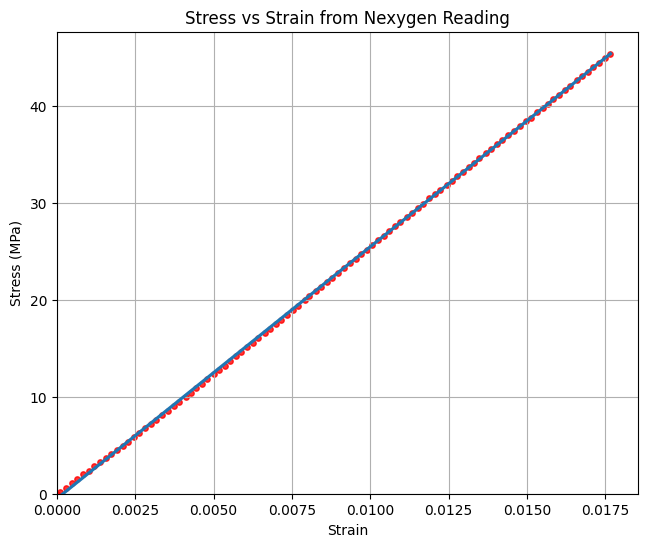

In [61]:
# Make scatter plot
plt.figure(figsize=(7.5, 6))

# sns.scatterplot(x='Extension (mm)', y='Load (N)', data=df)
sns.regplot(x='Strain', y='Stress (MPa)', data=kom, fit_reg=True, scatter_kws={"s": 15, "color": "red"})

plt.xlim(0, max(kom['Strain']) * 1.05)
plt.ylim(0, max(kom['Stress (MPa)']) * 1.05)
plt.title('Stress vs Strain from Nexygen Reading')
plt.grid()

plt.show()

In [62]:
# Do linear regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(kom['Strain'], kom['Stress (MPa)'])

print(f'slope = {slope / 1000} GPa')
print(f'sslope = {slope / 1000 * usigmar} GPa')

slope = 2.59739772191969 GPa
sslope = 0.014623200888523055 GPa


In [63]:
V = 200 #V
S = 2.11
n = 1

uSr = 0.01
uDE = 0.0005 #V


In [64]:
vol['Voltage (V)'] = vol['Voltage (V)'] + 0.001
vol['Error Voltage (V)'] = uDE
vol['Strain'] = 4 * vol['Voltage (V)'] / (n * V * S)
vol['Error Strain Rel Squared'] = (uSr**2 + (uDE / vol['Voltage (V)'])**2)
vol['Error Strain'] = vol['Strain'] * vol['Error Strain Rel Squared']**0.5
vol['Stress (MPa)'] = vol['Load (N)'] / (A * 1000000)
vol['Error Stress (MPa)'] = vol['Stress (MPa)'] * usigmar

In [65]:
vol

,Load (N),Voltage (V),Error Voltage (V),Strain,Error Strain Rel Squared,Error Strain,Stress (MPa),Error Stress (MPa)
0,0,0.000,0.0005,0.000000,inf,NaN,0.000000,0.000000
1,100,0.004,0.0005,0.000038,0.015725,0.000005,2.292269,0.012905
2,200,0.006,0.0005,0.000057,0.007044,0.000005,4.584539,0.025811
3,300,0.009,0.0005,0.000085,0.003186,0.000005,6.876808,0.038716
4,400,0.011,0.0005,0.000104,0.002166,0.000005,9.169078,0.051621
5,500,0.014,0.0005,0.000133,0.001376,0.000005,11.461347,0.064527
6,600,0.017,0.0005,0.000161,0.000965,0.000005,13.753617,0.077432
7,700,0.020,0.0005,0.000190,0.000725,0.000005,16.045886,0.090337
8,800,0.022,0.0005,0.000209,0.000617,0.000005,18.338156,0.103243
9,900,0.025,0.0005,0.000237,0.000500,0.000005,20.630425,0.116148


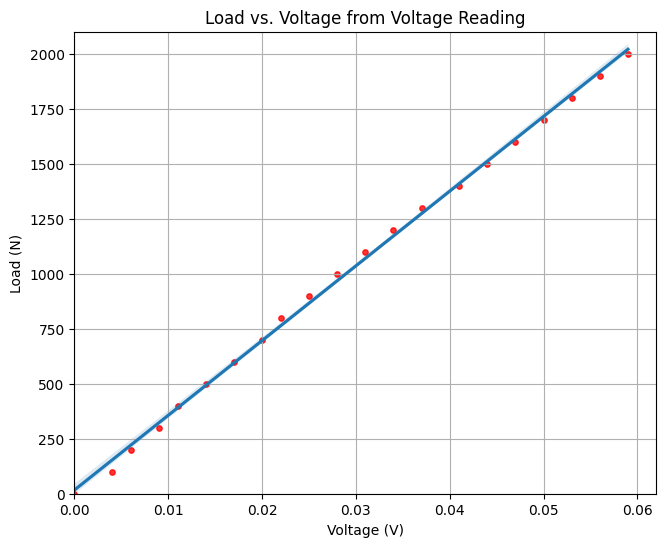

In [66]:
# Make scatter plot
plt.figure(figsize=(7.5, 6))

# sns.scatterplot(x='Extension (mm)', y='Load (N)', data=df)
sns.regplot(x='Voltage (V)', y='Load (N)', data=vol, fit_reg=True, scatter_kws={"s": 15, "color": "red", "marker": "x"})

plt.xlim(0, max(vol['Voltage (V)']) * 1.05)
plt.ylim(0, max(vol['Load (N)']) * 1.05)
plt.title('Load vs. Voltage from Voltage Reading')
plt.grid()

plt.show()

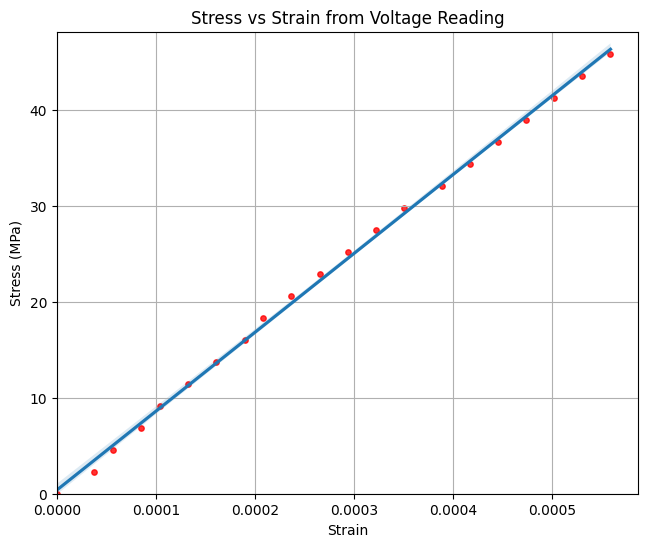

In [67]:
# Make scatter plot
plt.figure(figsize=(7.5, 6))

# sns.scatterplot(x='Extension (mm)', y='Load (N)', data=df)
sns.regplot(x='Strain', y='Stress (MPa)', data=vol, fit_reg=True, scatter_kws={"s": 15, "color": "red"})

plt.xlim(0, max(vol['Strain']) * 1.05)
plt.ylim(0, max(vol['Stress (MPa)']) * 1.05)
plt.title('Stress vs Strain from Voltage Reading')
plt.grid()

plt.show()

In [68]:
# Do linear regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(vol['Strain'], vol['Stress (MPa)'])

print(f'slope = {slope / 1000} GPa')
print(f'sslope = {slope / 1000 * usigmar} GPa')

slope = 82.12345177522117 GPa
sslope = 0.4623503450524416 GPa


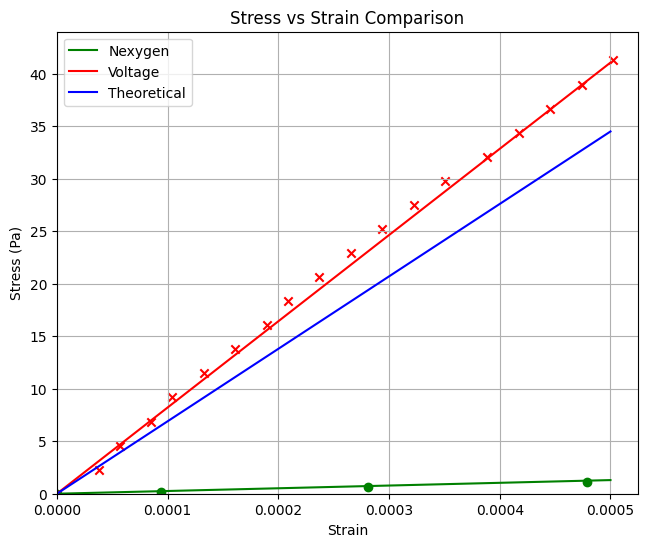

In [99]:
# Make scatter plot comparing all stress-strain curve
plt.figure(figsize=(7.5, 6))

# Draw line with slope of 2.59739772191969 GPa
plt.plot([0, 0.0005], [0, 0.0005 * 2.59739772191969 * 1000], color='green')

# Draw line with slope of 82.12345177522117 GPa
plt.plot([0, 0.0005], [0, 0.0005 * 82.12345177522117 * 1000], color='red')

# Draw line with slope of 69 GPa
plt.plot([0, 0.0005], [0, 0.0005 * 69000], color='blue')

# Set limit
plt.xlim(0, 0.0005 * 1.05)
plt.ylim(0, 40 * 1.10)

# Draw scatter plot with max value using xlim and ylim using plt
plt.scatter(kom['Strain'], kom['Stress (MPa)'], color='green', marker='o', label='Nexygen')
plt.scatter(vol['Strain'], vol['Stress (MPa)'], color='red', marker='x', label='Voltage')

plt.legend(['Nexygen', 'Strain Gage', 'Theoretical'])

plt.ylabel('Stress (Pa)')
plt.xlabel('Strain')

plt.title('Stress vs Strain Comparison')

plt.grid()
